In [12]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing Scipy
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_mouse = pd.merge(clinical_trial_df, mouse_drug_df, how='inner')

# Display the data table for preview

#mouse_drug_df -- checking sample
#clinical_trial_df -- checking sample
clinical_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [49]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_df = clinical_mouse.loc[:,['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
#tumor_volume_df.head() --checking sample

mean_sem_tv = tumor_volume_df.groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)" :["mean", "sem"]})
mean_sem_tv

Tumor Volume (mm3)          
                                  mean       sem
Drug      Timepoint                             
Capomulin 0                  45.000000  0.000000
          5                  44.266086  0.448593
          10                 43.084291  0.702684
          15                 42.064317  0.838617
          20                 40.716325  0.909731
          25                 39.939528  0.881642
          30                 38.769339  0.934460
          35                 37.816839  1.052241
          40                 36.958001  1.223608
          45                 36.236114  1.223977
Ceftamin  0                  45.000000  0.000000
          5                  46.503051  0.164505
          10                 48.285125  0.236144
          15                 50.094055  0.332053
          20                 52.157049  0.359482
          25                 54.287674  0.439356
          30                 56.769517  0.490620
          35                 58.827548  0.692248
          40                 61.467895  0.708505
          45                 64.132421  0.902358
Infubinol 0                  45.000000  0.000000
          5                  47.062001  0.235102
          10                 49.403909  0.282346
          15                 51.296397  0.357705
          20                 53.197691  0.476210
          25                 55.715252  0.550315
          30                 58.299397  0.631061
          35                 60.742461  0.984155
          40                 63.162824  1.055220
          45                 65.755562  1.144427
...                                ...       ...
Ramicane  0                  45.000000  0.000000
          5                  43.944859  0.482955
          10                 42.531957  0.720225
          15                 41.495061  0.770432
          20                 40.238325  0.786199
          25                 38.974300  0.746991
          30                 38.703137  0.864906
          35                 37.451996  0.967433
          40                 36.574081  1.128445
          45                 34.955595  1.226805
Stelasyn  0                  45.000000  0.000000
          5                  47.527452  0.239862
          10                 49.463844  0.433678
          15                 51.529409  0.493261
          20                 54.067395  0.621889
          25                 56.166123  0.741922
          30                 59.826738  0.899548
          35                 62.440699  1.003186
          40                 65.356386  1.410435
          45                 68.438310  1.576556
Zoniferol 0                  45.000000  0.000000
          5                  46.851818  0.188950
          10                 48.689881  0.263949
          15                 50.779059  0.370544
          20                 53.170334  0.533182
          25                 55.432935  0.602513
          30                 57.713531  0.800043
          35                 60.089372  0.881426
          40                 62.916692  0.998515
          45                 65.960888  1.003576

[100 rows x 2 columns]

In [57]:
# Create lists of the tumor volume means for each of the four drugs being converted to dataframe
cap_tvmean_list = mean_sem_tv.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
cef_tvmean_list = mean_sem_tv.loc['Ceftamin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
inf_tvmean_list = mean_sem_tv.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
ket_tvmean_list = mean_sem_tv.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
pro_tvmean_list = mean_sem_tv.loc['Propriva'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
naf_tvmean_list = mean_sem_tv.loc['Naftisol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
plc_tvmean_list = mean_sem_tv.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
ram_tvmean_list = mean_sem_tv.loc['Ramicane'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
ste_tvmean_list = mean_sem_tv.loc['Stelasyn'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
zon_tvmean_list = mean_sem_tv.loc['Zoniferol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
     

# Create lists of the tumor volume sems for each of the four drugs being converted to dataframe
cap_tvsem_list = mean_sem_tv.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
cef_tvsem_list = mean_sem_tv.loc['Ceftamin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
inf_tvsem_list = mean_sem_tv.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
ket_tvsem_list = mean_sem_tv.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
pro_tvsem_list = mean_sem_tv.loc['Propriva'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
naf_tvsem_list = mean_sem_tv.loc['Naftisol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
plc_tvsem_list = mean_sem_tv.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
ram_tvsem_list = mean_sem_tv.loc['Ramicane'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
ste_tvsem_list = mean_sem_tv.loc['Stelasyn'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
zon_tvsem_list = mean_sem_tv.loc['Zoniferol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()

meanlist_df = pd.DataFrame({"Capomulin": cap_tvmean_list, 
                        "Ceftamin" : cef_tvmean_list,
                        "Infubinol": inf_tvmean_list,
                        "Ketapril": ket_tvmean_list,
                        "Naftisol": naf_tvmean_list,
                        "Placebo": plc_tvmean_list,
                        "Propriva": pro_tvmean_list,
                        "Ramicane": ram_tvmean_list,
                        "Stelasyn": ste_tvmean_list,
                        "Zoniferol": zon_tvmean_list})

semlist_df = pd.DataFrame({"Capomulin": cap_tvsem_list, 
                        "Ceftamin" : cef_tvsem_list,
                        "Infubinol": inf_tvsem_list,
                        "Ketapril": ket_tvsem_list,
                        "Naftisol": naf_tvsem_list,
                        "Placebo": plc_tvsem_list,
                        "Propriva": pro_tvsem_list,
                        "Ramicane": ram_tvsem_list,
                        "Stelasyn": ste_tvsem_list,
                        "Zoniferol": zon_tvsem_list})

meanlist_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


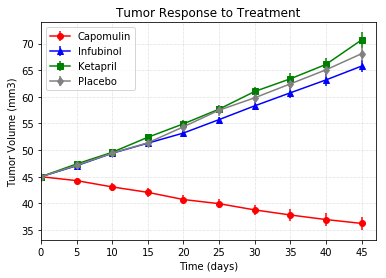

In [68]:
# Scatter plot showing how tumor volume changes over time for each treatment
ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Plot the 'mean' list vs. the established x axis with error 
ax.errorbar(x_axis, cap_tvmean_list, yerr=cap_tvsem_list, fmt="red", marker="o", label="Capomulin")
ax.errorbar(x_axis, inf_tvmean_list, yerr=inf_tvsem_list, fmt="blue", marker="^", label="Infubinol")
ax.errorbar(x_axis, ket_tvmean_list, yerr=ket_tvsem_list, fmt="green", marker="s", label="Ketapril")
ax.errorbar(x_axis, plc_tvmean_list, yerr=plc_tvsem_list, fmt="grey", marker="d", label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis)+2)
        
# Show the resulting scatter plot
plt.show()

In [25]:
# Convert to DataFrame
meta_sites_df = clinical_mouse.loc[:,['Drug', 'Timepoint', 'Metastatic Sites']]

# Preview DataFrame
meta_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0
1,Capomulin,5,0
2,Capomulin,10,0
3,Capomulin,15,0
4,Capomulin,20,0


In [69]:
# Group meta_sites_df by 'Drug' and 'Timepoint'
# Calculate mean and standard error of the mean (sem) for the 'Metastatic Sites'
mean_sem_meta = meta_sites_df.groupby(['Drug', 'Timepoint']).agg({"Metastatic Sites" :["mean", "sem"]})
mean_sem_meta.head()

Metastatic Sites          
                                mean       sem
Drug      Timepoint                           
Capomulin 0                 0.000000  0.000000
          5                 0.160000  0.074833
          10                0.320000  0.125433
          15                0.375000  0.132048
          20                0.652174  0.161621

In [ ]:
 # Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame